In [1]:
import catalogue_analysis as ca
import redshift_weights as rw
import numpy as np
from astropy.table import join,Table,Column,vstack,setdiff
from astropy.io import fits

######################################################################################################################
# Select list of catalogues on which analysis is based
FileSet = 'Y3'
info = True   #choose whether to echo stats on each dataset
fresh_kcorr = True #choose whether to recompute k-corrections and restframe colours or use existing tables
plot = True         #set to false if you don't want so many diagnostic plots
######################################################################################################################

if (FileSet == 'Y1'):
  #Load the catalogue  (set fpath as required)
  fpathN='/pscratch/sd/a/amjsmith/Y1/LSS/iron/LSScats/v0.5/BGS_BRIGHT_N_clustering.dat.fits' #clustering catalogue north
  fpathS='/pscratch/sd/a/amjsmith/Y1/LSS/iron/LSScats/v0.5/BGS_BRIGHT_S_clustering.dat.fits' #clustering catalogue south
  #load clustering catalogue  (Y1 was in two parts which we concaternate)
  datall=ca.load_catalogues(fpathN,fpathS)
  fullfile='/pscratch/sd/a/amjsmith/Y1/LSS/iron/LSScats/v0.5/BGS_BRIGHT_full.dat.fits'  # full observed catalogue used for redshift weights 
  fsffile='/global/u2/s/smcole/DESI/NvsS/data/fastspec-iron-main-bright.fits' #fsf file used for k-corrections  
elif (FileSet == 'Y3'):
  fpath='/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/test/nonKP/BGS_BRIGHT_clustering.dat.fits' #clustering catalogue
  datall=ca.Y3load_catalogues(fpath)
  #Load clustering catalogue  
  fullfile='/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/test/BGS_BRIGHT_full_HPmapcut.dat.fits' #full observed catalogue used for redshift weights 
  fsffile='/global/u2/s/smcole/DESI/NvsS/data/fastspec-iron-main-bright.fits' #fsf file used for k-corrections  
else:
  print('Set of files on which analysis is to be based is not specified')

# Read full observed catalogue and extract the observed (meeting certain cuts) and zgood (also has good redshift) subsets 
zgood,observed= ca.load_full_catalogue_subsets(fullfile)
if (info):
    print('Statistics of the observed catalogue:')
    observed.info('stats')
    print('Statistics of the zgood catalogue:')
    zgood.info('stats')

if (info):
    print('Statistics of the clustering catalogue:')
    datall.info('stats')    

#Specify regions to loop over
regions=('N', 'S')


#Random sample and apply all cuts from the start for a quick run through
Sel=ca.selection('N')# import North selection cuts  
smaskN= (datall['Z'] > Sel['zmin']) & (datall['Z'] < Sel['zmax']) & (np.random.rand(datall['Z'].size)<Sel['f_ran'])\
& (datall['rmag'] < Sel['faint'])  & (datall['rmag'] > Sel['bright']) & (datall['reg']=='N') 
Sel=ca.selection('S') # import South selection cuts    
smaskS= (datall['Z'] > Sel['zmin']) & (datall['Z'] < Sel['zmax']) &(np.random.rand(datall['Z'].size)<Sel['f_ran']) \
& (datall['rmag'] < Sel['faint'])  & (datall['rmag'] > Sel['bright']) & (datall['reg']=='S')
smask= np.logical_or(smaskN,smaskS) #True for objects making cuts in North or South
dat=datall[smask]    
print('South sample size:',smaskS.sum())
print('North sample size:',smaskN.sum())




if (info):
    print('Statistics of the data catalogue after applying the selection cuts:')
    dat.info('stats')

Size of Full catalogue 10623399
Faintest Fibre mag: 25.411306 NB BGS was limited to r_fib=23 in an earlier version of the photometry
number of objects in the observed subset 7980009
number of objects in the good redshift subset 7887861
Faintest Observed Fibre mag: 25.411306
Statistics of the observed catalogue:
<Table length=7980009>
           name                mean         std         min          max      n_bad 
-------------------------- ------------ ----------- ------------ ----------- -------
                  TARGETID  3.96297e+16 2.48551e+12  3.96273e+16 3.96374e+16       0
                MWS_TARGET     0.164555     33.0836            0       10240       0
               SUBPRIORITY     0.545707    0.285051  6.22789e-07           1       0
             PRIORITY_INIT         2100           0         2100        2100       0
              TARGET_STATE           --          --           --          --       0
                 TIMESTAMP           --          --           --     

Recomputing colour look-up and k-correction polynomials
Reading John Moustakas FSF catalogue /global/u2/s/smcole/DESI/NvsS/data/fastspec-iron-main-bright.fits...
statistics of the Fast Spectral Fitting Catalogue used for k-correction
<Table length=6337896>
       name            mean        std         min          max    
------------------ ----------- ----------- ------------ -----------
        TARGETID_1 3.96179e+16 6.55637e+14  2.37633e+15 3.96373e+16
                 Z    0.238948    0.113602    0.0100012    0.599999
    KCORR01_SDSS_G   -0.105318    0.377891     -2.16663     0.99587
    KCORR01_SDSS_R   -0.129995    0.205341     -1.90124     1.06769
   ABSMAG01_SDSS_G    -19.5251     1.20986     -27.2876           0
   ABSMAG01_SDSS_R    -20.2564     1.28957     -27.5826           0
        TARGETID_2 3.96179e+16 6.55637e+14  2.37633e+15 3.96373e+16
            SURVEY          --          --           --          --
           PROGRAM          --          --           --        

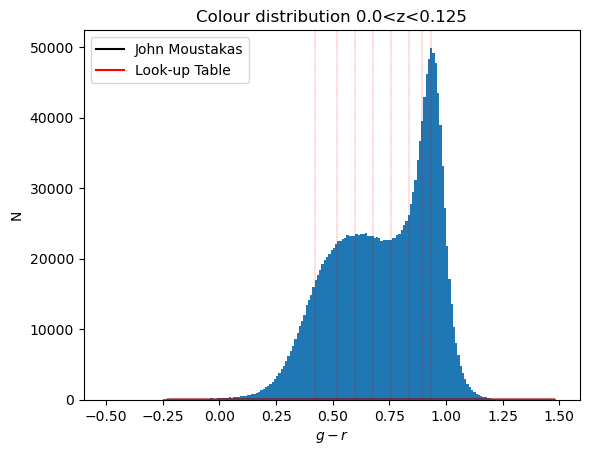

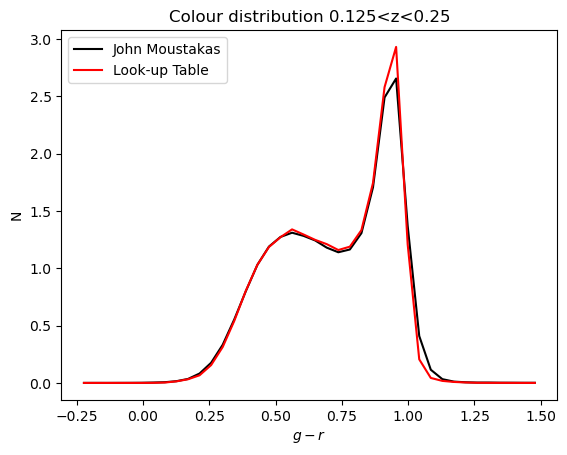

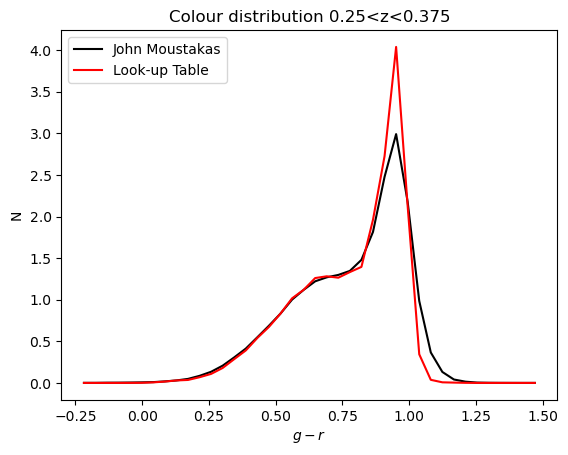

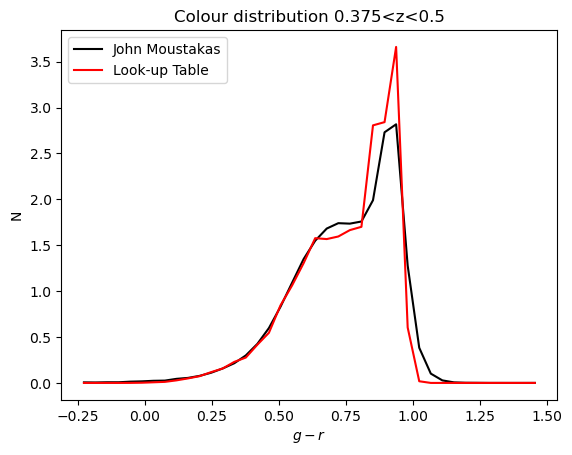

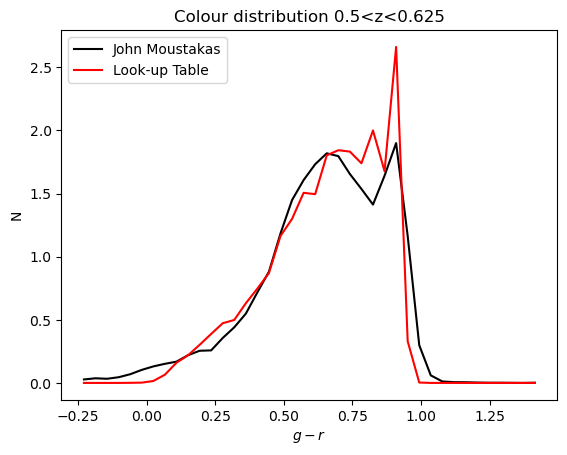

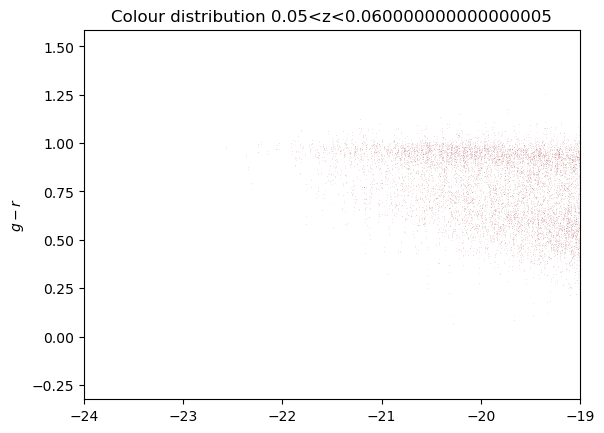

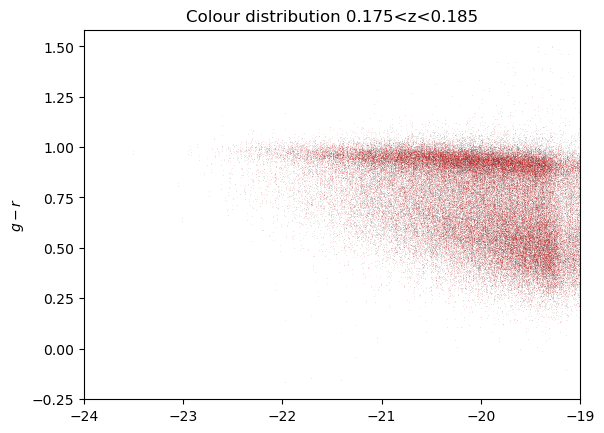

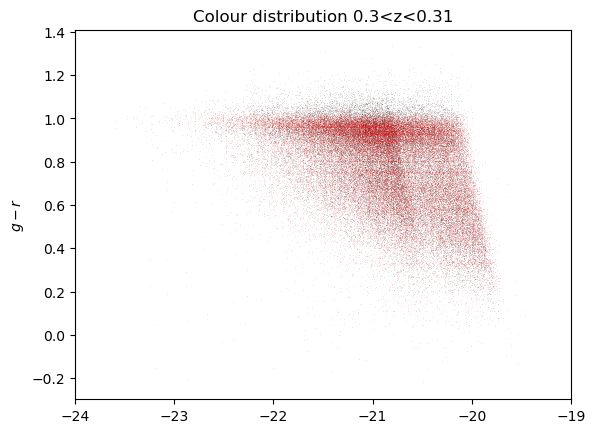

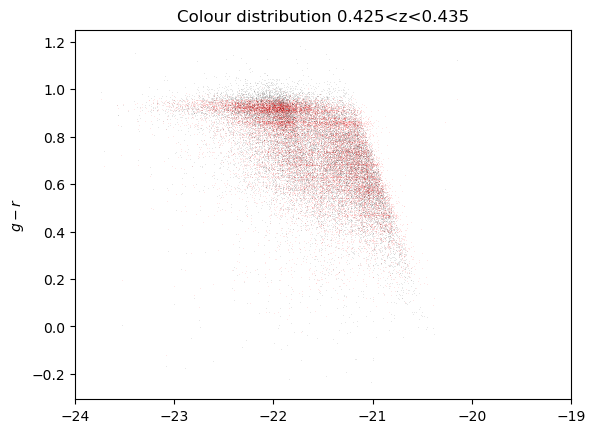

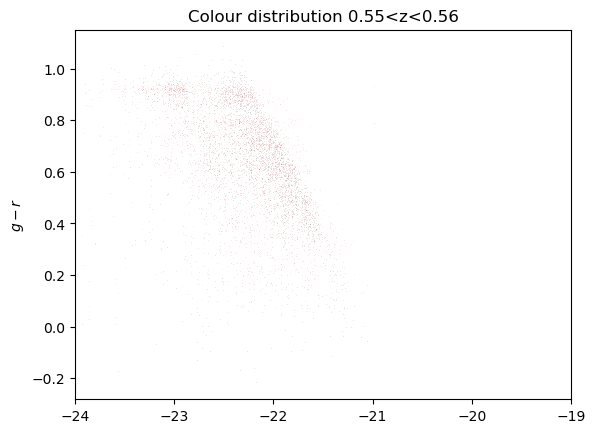

Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_N_rband_z01.dat
plots of the run of median k-corrections, the polynomial fits and the difference


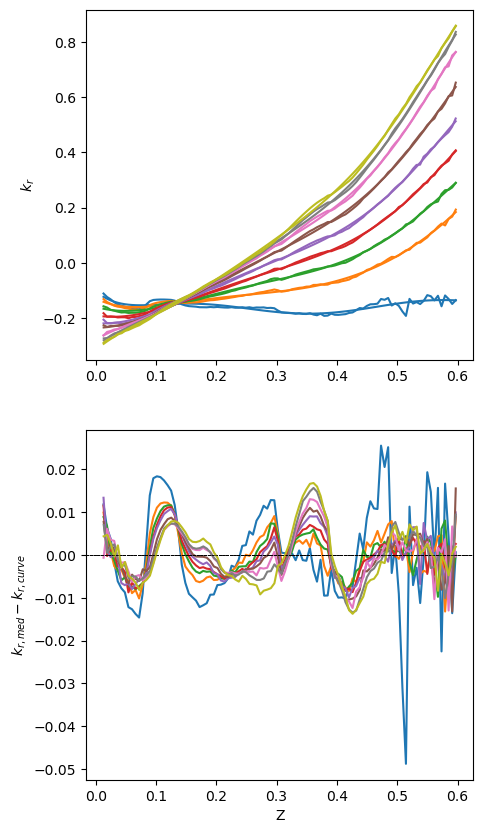

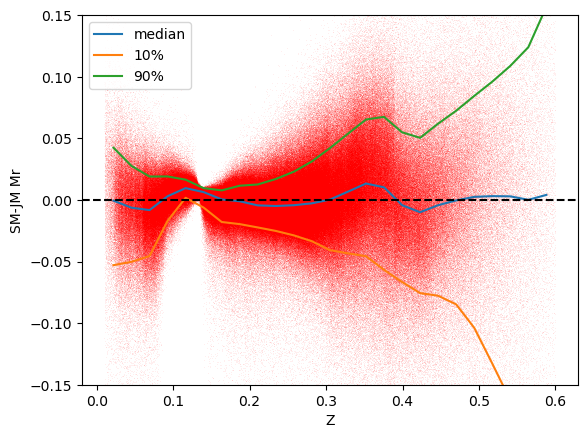

LOADING IN LOOKUP TABLE


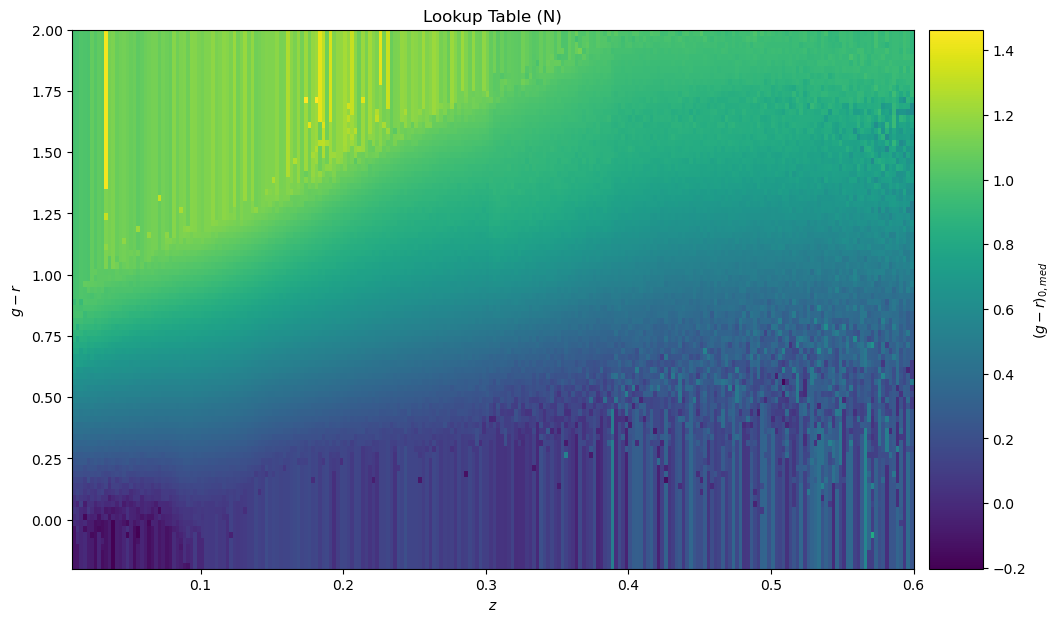

REST-FRAME COLOURS ASSIGNED.
Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_N_rband_z01.dat
Computing restframe colours for region  S
GENERATING NEW LOOKUP TABLE.
LOOK-UP TABLE GENERATED AND SAVED.
Writing k-correction polynomials to ./data/jmext_kcorr_S_rband_z01.dat
Reloading look-up table to apply to the FSF catalogue
LOADING IN LOOKUP TABLE
REST-FRAME COLOURS ASSIGNED.
Comparing the distributions of newly assigned colours with those of the originals


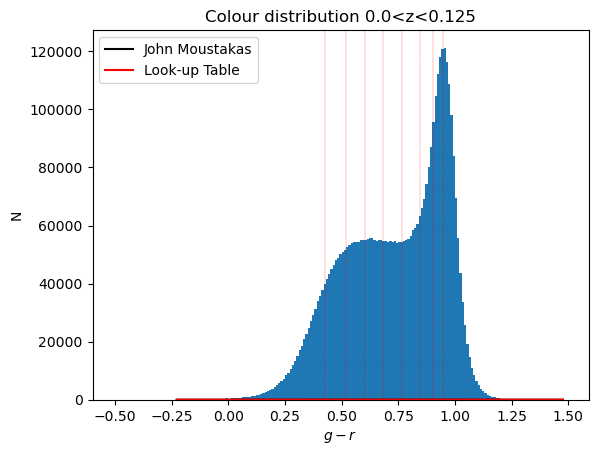

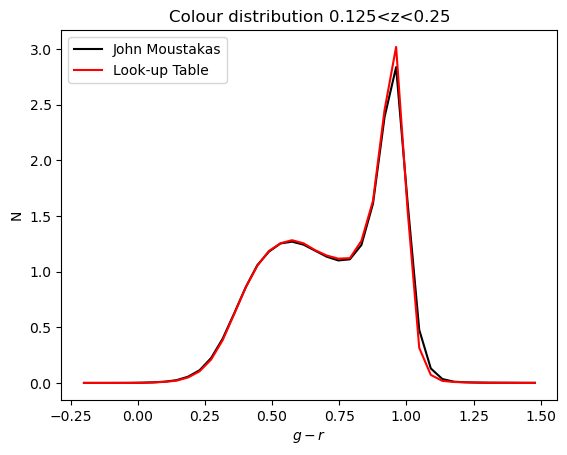

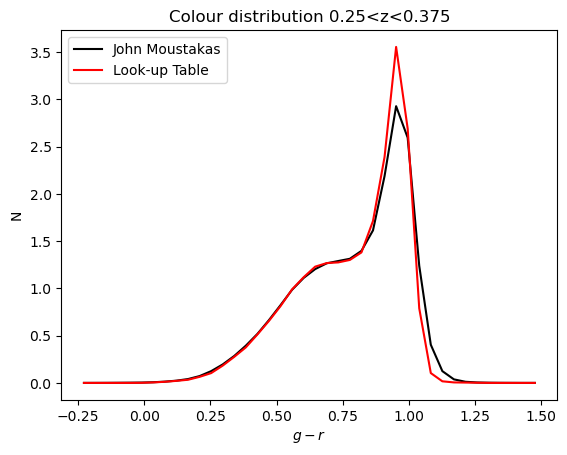

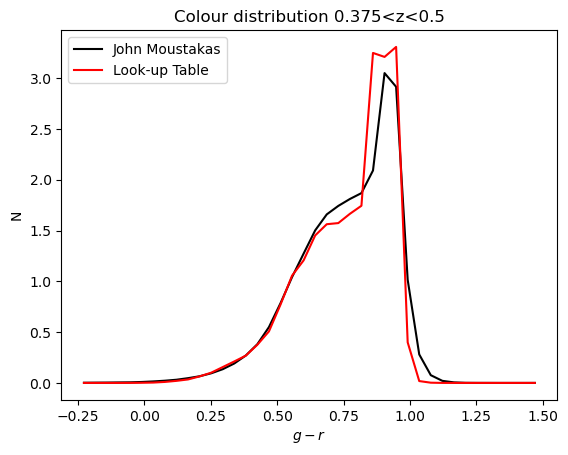

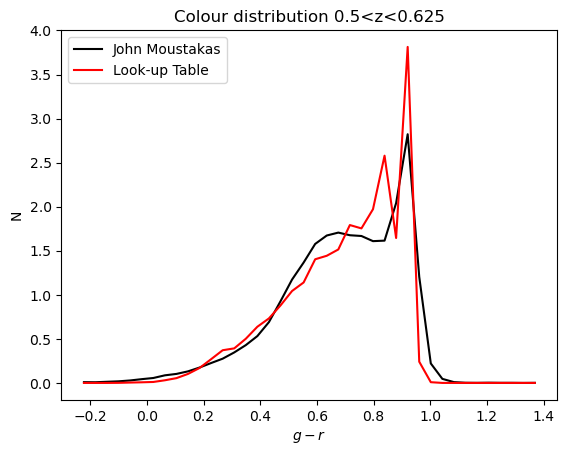

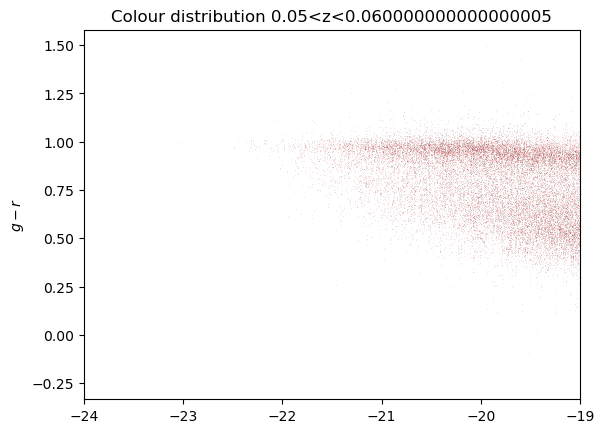

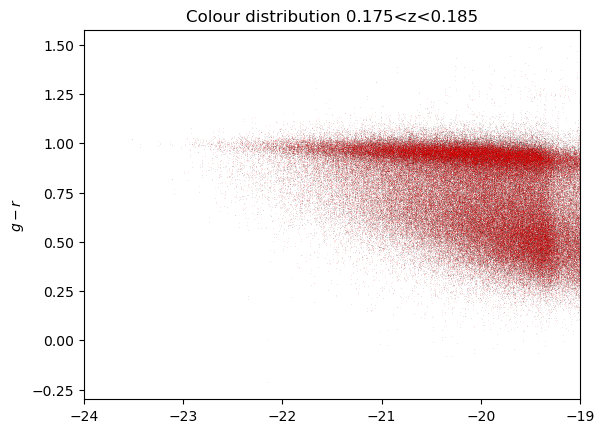

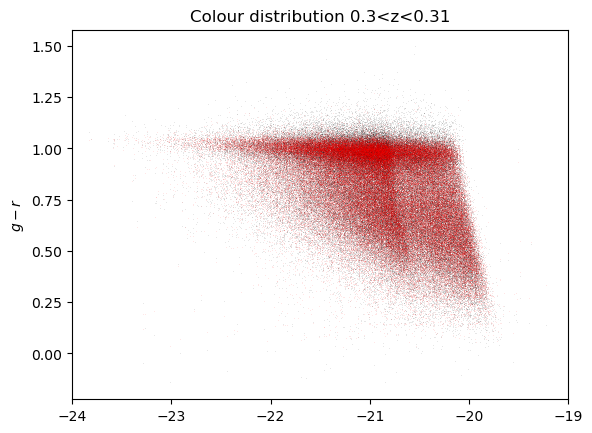

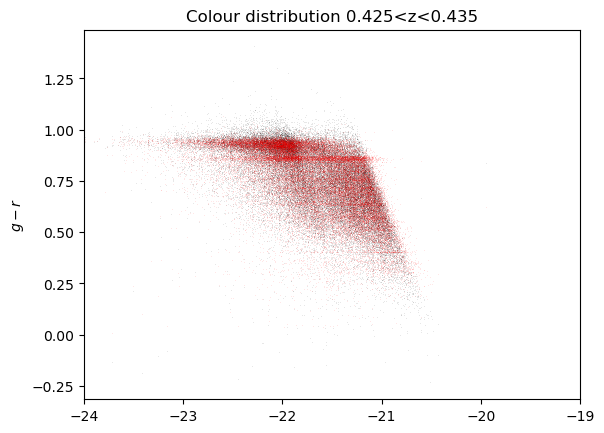

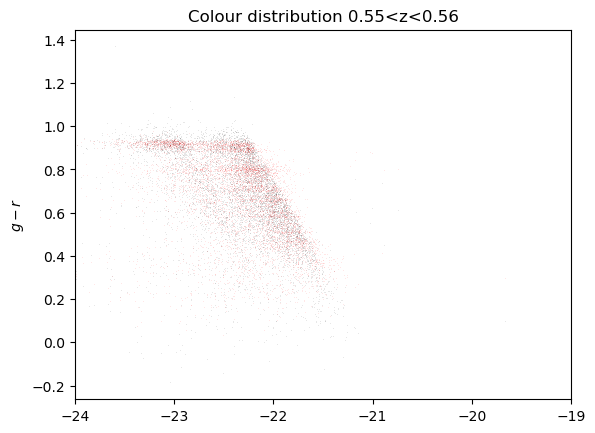

Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_S_rband_z01.dat
plots of the run of median k-corrections, the polynomial fits and the difference


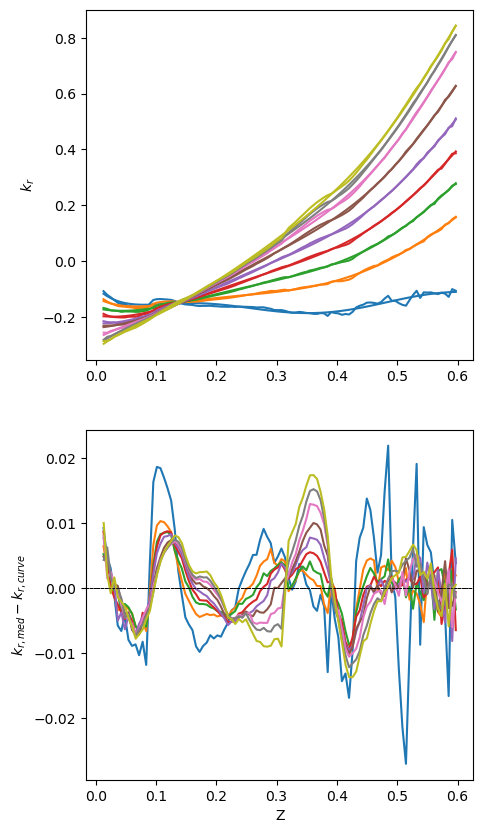

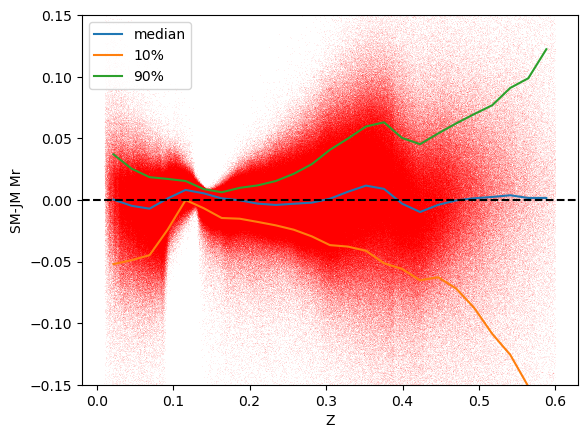

LOADING IN LOOKUP TABLE


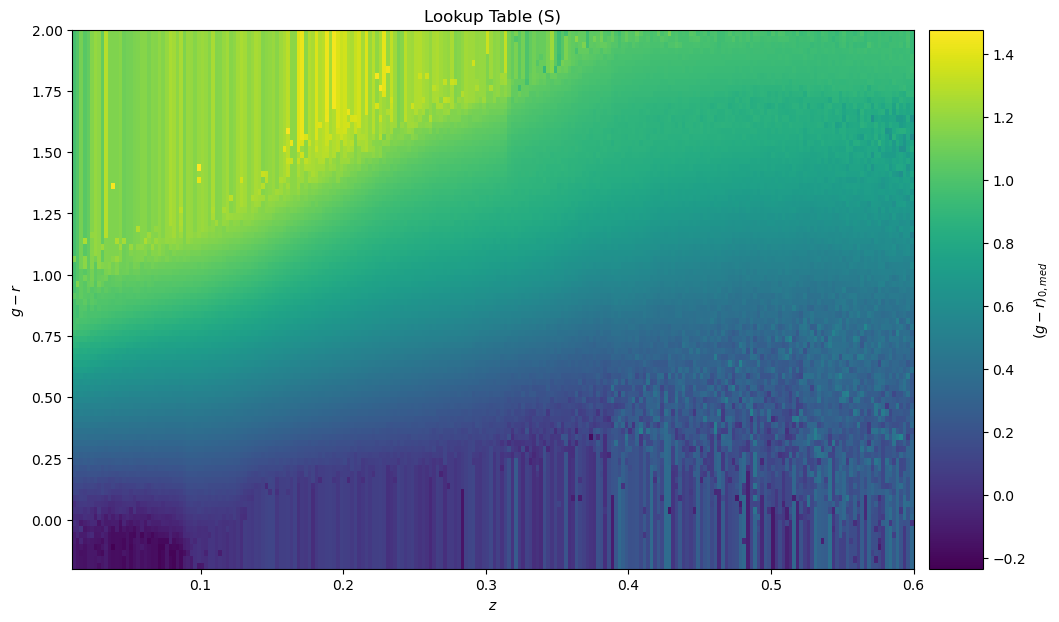

REST-FRAME COLOURS ASSIGNED.
Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_S_rband_z01.dat
Statistics of the data catalogue after computing and adding rest frame colours and absolute magnitudes:
<Table length=4118915>
     name         mean        std         min         max    
------------- ----------- ----------- ----------- -----------
     TARGETID 3.96296e+16 2.47026e+12 3.96273e+16 3.96373e+16
            Z    0.213628    0.104592  0.00200252    0.599994
        NTILE     1.86582    0.885123           1           4
        TILES          --          --          --          --
           RA     192.368     87.7893 0.000108207         360
          DEC     19.4902     22.9413    -19.4334     79.2584
 flux_g_dered     26.2189     90.5242    0.551198     9795.15
 flux_r_dered     58.0159     180.401     15.2757     15512.8
 flux_z_dered     102.361      307.17           0     28272.6
flux_w1_dered     98.5319     225.156    -5154.15       268

In [2]:
# If you want to recompute the colour lookup table and k-correction polynomials set fresh=True otherwise re-use stored table and fits
fresh = fresh_kcorr

if (fresh == True) :
  print('Recomputing colour look-up and k-correction polynomials')
  # Read John Moustakas's Fast Spec Catalogue
  fsf=ca.read_fsf(fsffile)
  print('statistics of the Fast Spectral Fitting Catalogue used for k-correction')
  fsf.info('stats')
  ca.recompute_rest_col_mag(dat,regions,fsf,fresh=fresh,plot=plot)  
else:
  fsf='null' #just defining the variable so code doesn't complain  
  print('Using pre-computed colour look-up and k-correction polynomials')
  #compute rest frame colours and absolute magnitudes using k-corrections already computed from the fsf catalogue
  ca.recompute_rest_col_mag(dat,regions,fsf,fresh=False,plot=plot)

if (info):
   print('Statistics of the data catalogue after computing and adding rest frame colours and absolute magnitudes:')
   dat.info('stats')

Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_N_rband_z01.dat
Reading k-correction polynomials from  /global/u2/s/smcole/DESI/NvsS/data//jmext_kcorr_S_rband_z01.dat


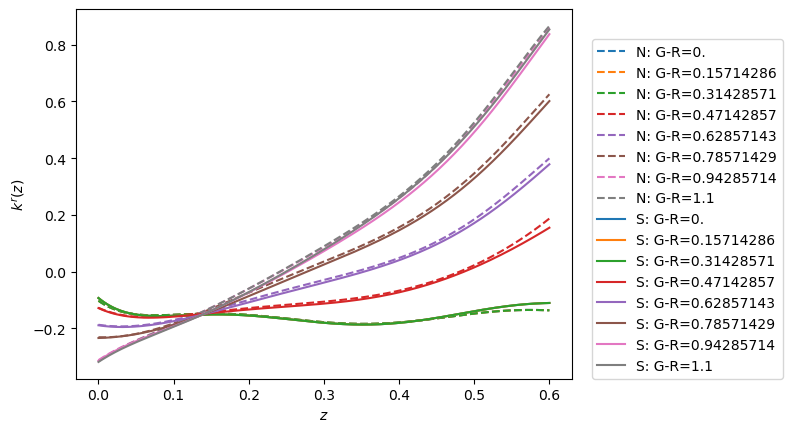

In [3]:
#Plot k-corrections to check they are well behaved
ca.plot_kcorr(regions)

Using healpix map with NSIDE=32 and pixel area 3.357 sq.deg.


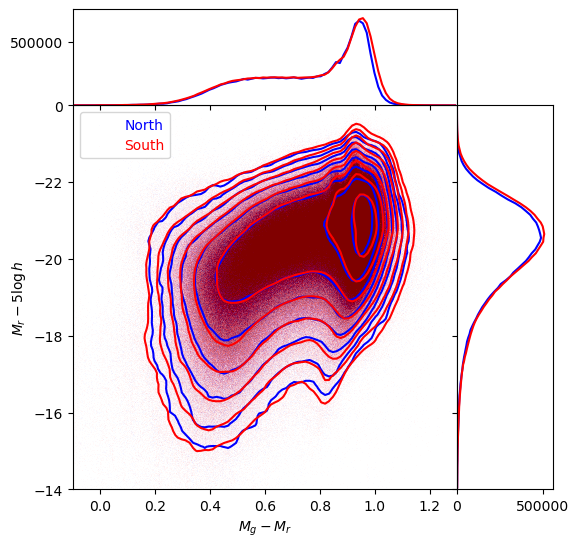

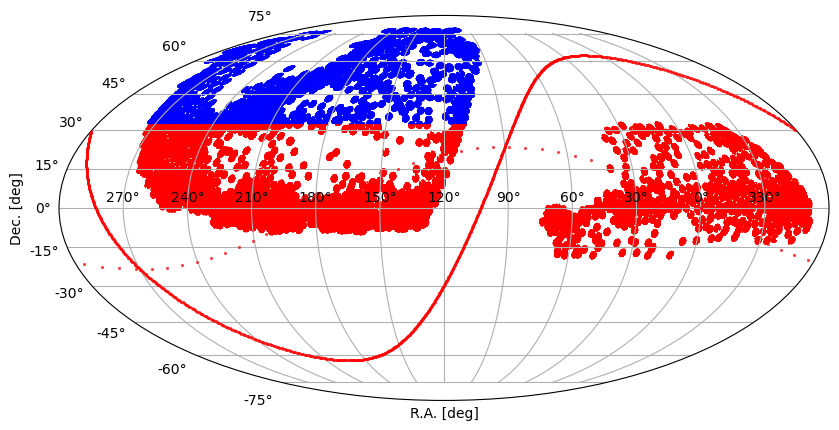

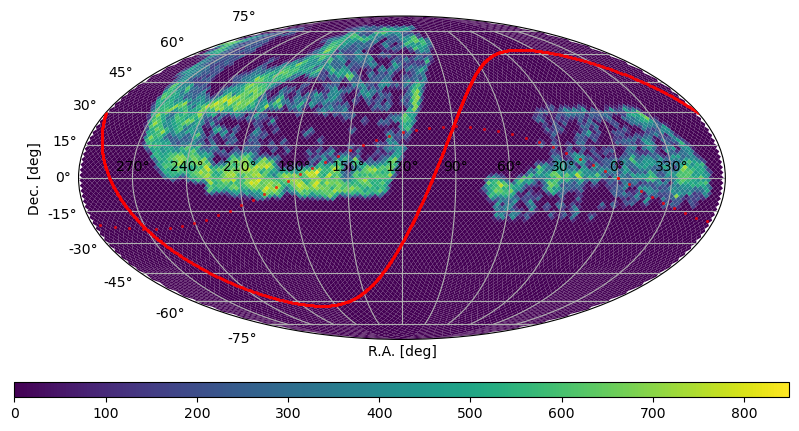

In [4]:
#colour-magnitude distributions
ca.plot_col_mag(dat,regions)
#sky plot
ca.sky_plot(dat,regions)

Number of bins in fibmag and TSNR2_BGS used in weight look-up table. nx,ny: 60 44
number of observed objects in region and covered by the grid 1237786
N : missed and unrepresented objects 17.0
The following plots are the raw look-up table and as seen with CIC interpolation:


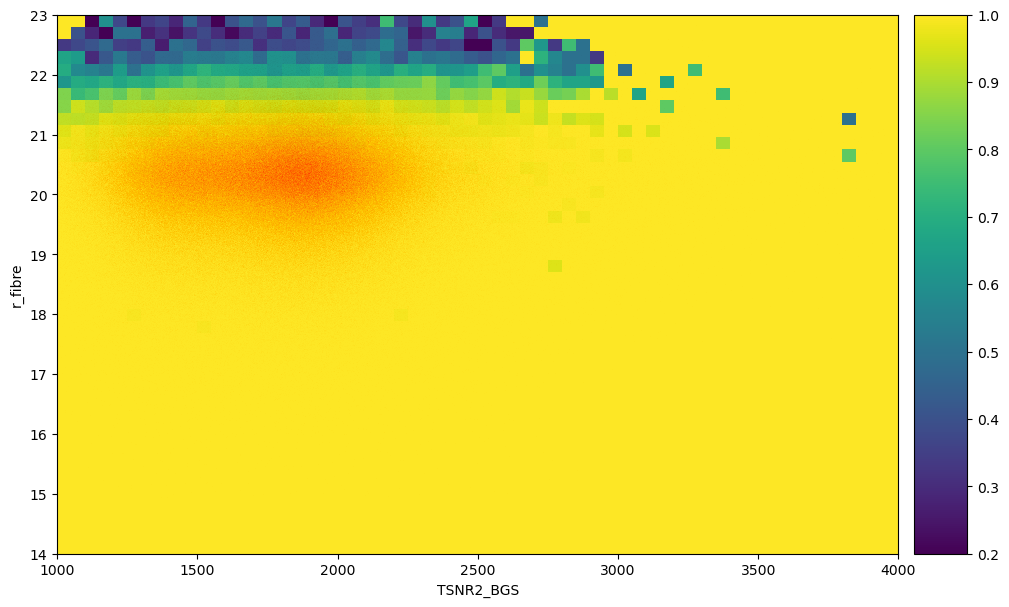

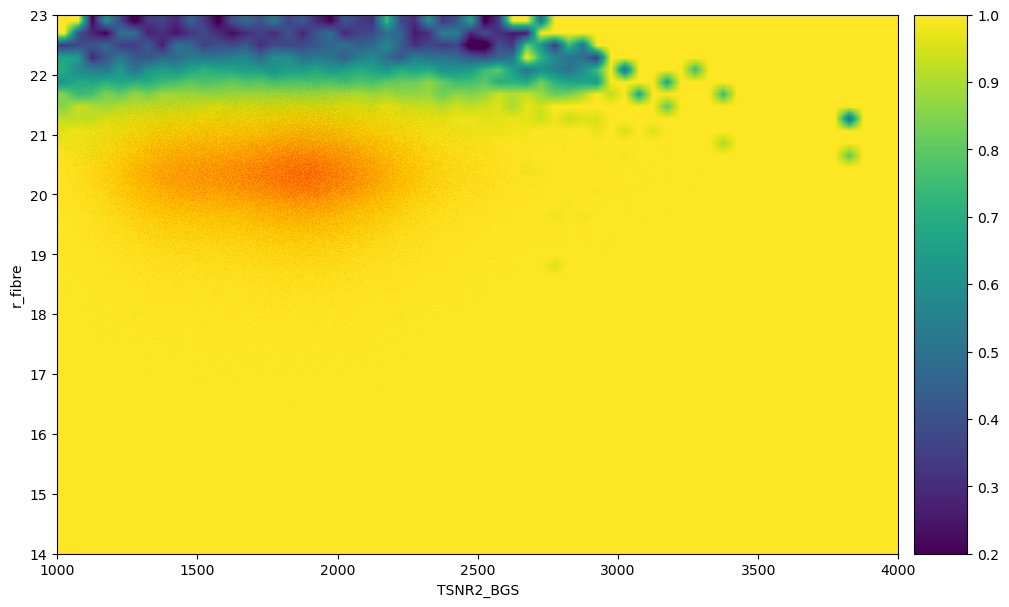

LOOK-UP TABLE GENERATED AND SAVED.
number of observed objects in region and covered by the grid 2953087
S : missed and unrepresented objects 9.0
The following plots are the raw look-up table and as seen with CIC interpolation:


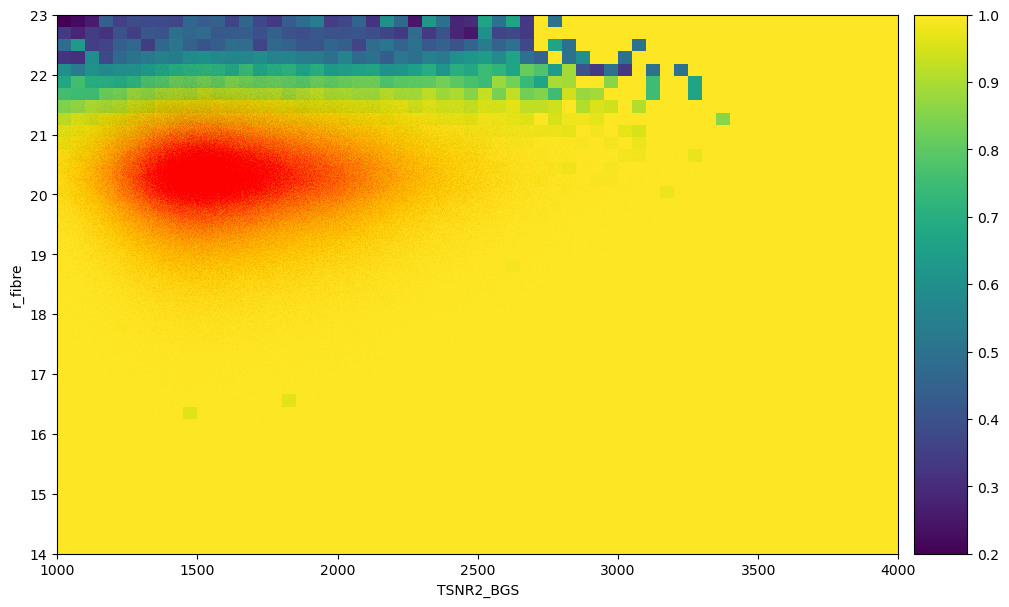

In [ ]:
# Construct the redshift weight table and add the fibmag and TSNR2_BGS columns to the data catalogue
dat=rw.construct_weight_table(dat, observed, zgood, plot=plot)
#Assign redshift incompleteness weights using now pre-computed look-up table
dat.info('stats')
rw.assign_redshift_weight(dat,regions)

starmask= (zgood['Z_not4clus']<0.00125)
print('nstars=',zgood['FLUX_R'][starmask].size,' nstars/ngood=',zgood['FLUX_R'][starmask].size/zgood['FLUX_R'].size)

dat.info('stats')

In [ ]:
#Match the dat and observed tables and copy data to add addtional columns to the dat table
len_before=len(dat)
dat = join(dat, observed['TARGETID','MORPHTYPE','EBV','PSFDEPTH_R','GALDEPTH_R','SHAPE_R'], keys='TARGETID')
len_after=len(dat)
if (len_before!=len_after): print('WARNING: dat table changed length when matching from ',length_before,' to ',length_after)


iteration 1 : 1215246  not yet converged
iteration 2 : 1215246  not yet converged
iteration 3 : 1214902  not yet converged
iteration 4 : 1099364  not yet converged
iteration 5 : 414291  not yet converged
iteration 6 : 80670  not yet converged
iteration 7 : 26631  not yet converged
iteration 8 : 12817  not yet converged
iteration 9 : 6740  not yet converged
iteration 10 : 4353  not yet converged
iteration 11 : 2917  not yet converged
iteration 12 : 2063  not yet converged
iteration 13 : 1478  not yet converged
iteration 14 : 1067  not yet converged
iteration 15 : 788  not yet converged
iteration 16 : 578  not yet converged
iteration 17 : 168  not yet converged
iteration 18 : 0  not yet converged
zmax values found
This is the right thing to do when zmax computed from the faint limit is greater than the zmax imposed in the sample selection
Similary it is the right thing to if zmin computed from the bright limit is less than the zmin imposed in the sample selection
reversing some bracketin

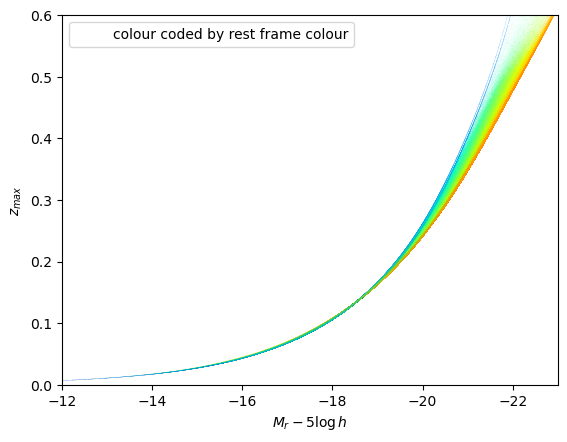

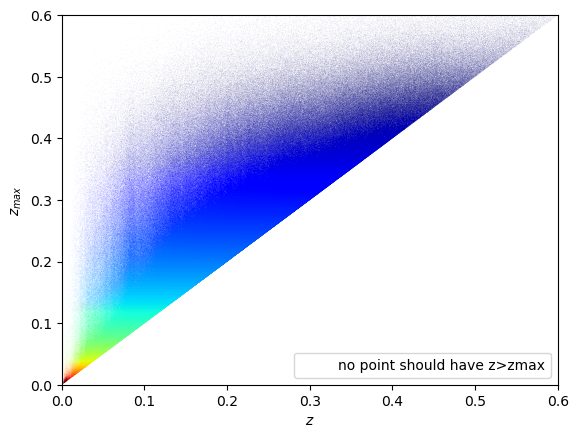

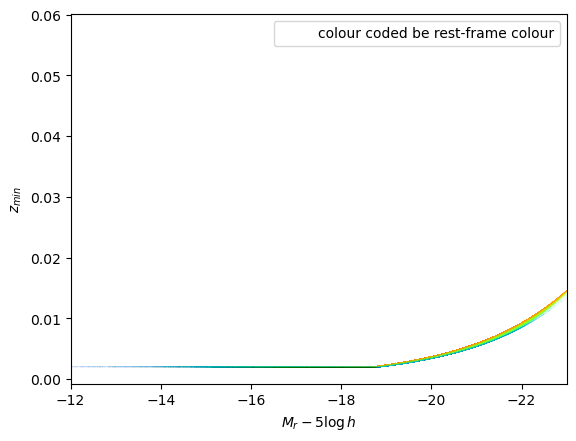

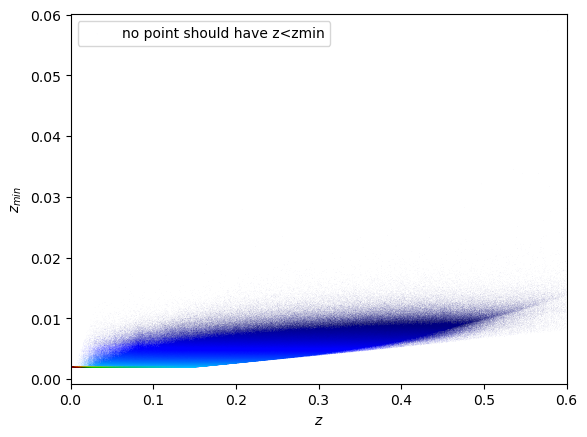

In [7]:
# Compute zmax and vmax values
ca.compute_zmax_vmax(dat,regions)
#  
# Make some test plots but avoid plotting data from any unprocessed region
if (len(regions) > 1):
   regmask=  ((dat['reg']=='N') | (dat['reg']=='S'))
else:    
   regmask= (dat['reg']==regions)

if plot:    
    #Plots of how zmax depends on absolute magnitude, colour and redshift
    ca.plot_zmax_absmag(dat[regmask])
    ca.plot_zmax_z(dat[regmask])
    #Plots of how zmin depends on absolute magnitude, colour and redshift
    ca.plot_zmin_absmag(dat)
    ca.plot_zmin_z(dat[regmask])

In [8]:
# Write the Augmented table to a fits file 
# Add meta data to store the selection cuts used in defining this sample and other information
Sel=ca.selection('N')
dat.meta['Qevol_N']=Sel['Qevol']
dat.meta['zmax_N']=Sel['zmax']
dat.meta['zmin_N']=Sel['zmin']
dat.meta['bright_N']=Sel['bright']
dat.meta['faint_N']=Sel['faint']
dat.meta['area_N']=Sel['area']
dat.meta['f_ran_N']=Sel['f_ran']
dat.meta['col_N']=Sel['col']
dat.meta['style_N']=Sel['style']

Sel=ca.selection('S')
dat.meta['Qevol_S']=Sel['Qevol']
dat.meta['zmax_S']=Sel['zmax']
dat.meta['zmin_S']=Sel['zmin']
dat.meta['bright_S']=Sel['bright']
dat.meta['faint_S']=Sel['faint']
dat.meta['area_S']=Sel['area']
dat.meta['f_ran_S']=Sel['f_ran']
dat.meta['col_S']=Sel['col']
dat.meta['style_S']=Sel['style']
#
# Store the parameters of the cosmology used to make this catalogue
dat.meta['H0']=ca.cosmo.H0.value
dat.meta['Tcmb0']=ca.cosmo.Tcmb0.value
dat.meta['Om0']=ca.cosmo.Om0

# Write the table complete with its meta data
#
dat.write('BGS_Y1.fits',overwrite=True) 


In [9]:
# quick look at the stats of the final augmented data set
dat.info('stats')

<Table length=4118915>
       name            mean        std         min         max    
------------------ ----------- ----------- ----------- -----------
          TARGETID 3.96296e+16 2.47026e+12 3.96273e+16 3.96373e+16
                 Z    0.213628    0.104592  0.00200252    0.599994
             NTILE     1.86582    0.885123           1           4
             TILES          --          --          --          --
                RA     192.368     87.7893 0.000108207         360
               DEC     19.4902     22.9413    -19.4334     79.2584
      flux_g_dered     26.2189     90.5241    0.551198     9795.15
      flux_r_dered     58.0159     180.401     15.2757     15512.8
      flux_z_dered     102.361      307.17           0     28272.6
     flux_w1_dered     98.5319     225.156    -5154.15       26891
     flux_w2_dered     68.4121     148.629    -12123.4       32890
      REST_GMR_0P1    0.755065    0.208759   -0.224542     1.45936
        ABSMAG_RP1    -20.2161      1.2